In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # support vector classifier
from sklearn.metrics import accuracy_score

In [5]:
def gen_data(num_data_pnts, mu1, mu2, plot):
    
    # mu1 and mu2 are 2D inputs with means of each condition for each variable
    tmp1 = np.random.randn(num_data_pnts, 1) + mu1[0]
    tmp2 = np.random.randn(num_data_pnts, 1) + mu1[1]
    c1_data = np.hstack((tmp1,tmp2))
    
    tmp1 = np.random.randn(num_data_pnts, 1) + mu2[0]
    tmp2 = np.random.randn(num_data_pnts, 1) + mu2[1]
    c2_data = np.hstack((tmp1,tmp2))
    
    if plot:
        plt.scatter(c1_data[:,0],c1_data[:,1],color='b')
        plt.scatter(c2_data[:,0],c2_data[:,1],color='r')
        plt.xlabel('Variable1')
        plt.ylabel('Variable2')
        plt.legend(['cond1','cond2'])
        plt.show()
    
    return c1_data, c2_data

## Prepare the data

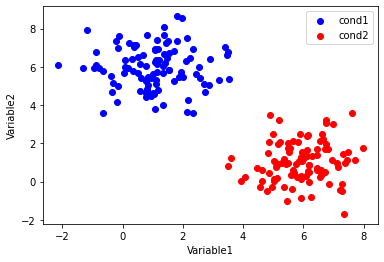

In [7]:
np.random.seed(8)

mu1 = np.array([1,6]) # condition1, variable 1 and 2
mu2 = np.array([6,1]) # condition2, variable 1 and 2
N = 100
d1, d2 = gen_data(N,mu1,mu2,1)

In [9]:
print(np.mean(d1))
print(np.mean(d2))

3.513081304480811
3.473680129135825


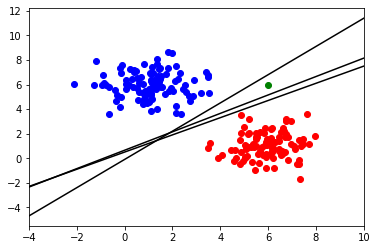

In [14]:
x_range = -4,10
x_vals = np.linspace(x_range[0],x_range[1])

plt.scatter(d1[:,0],d1[:,1],color='b')
plt.scatter(d2[:,0],d2[:,1],color='r')

for a,b in [(.75,.65),(.7,.5),(1.15,-.1)]:
    plt.plot(x_vals, a*x_vals + b, '-k')

plt.plot(6,6,'o', c='g')
    
plt.xlim(x_range[0],x_range[1])
plt.show()

In [58]:
p_train = .9
r,c = d1.shape
trn_length = int(np.round(p_train * r, 0)) # 90% of the dataset is going to be the training set
trn_data = np.vstack((d1[:trn_length,:],d2[:trn_length,:]))

tst_data = np.vstack((d1[trn_length:,:],d2[trn_length:,:]))

# add labels
trn_l = np.hstack((np.zeros(trn_length),np.ones(trn_length)))
tst_l = np.hstack((np.zeros(r-trn_length),np.ones(r-trn_length)))

## Train the SVM

In [59]:
# define the model
model = SVC(kernel='linear',C=.1) 
# smaller C means more dots close to the boundary will help define the decision_function
# smaller C = more support vectors

#fit the model
model.fit(trn_data,trn_l)

SVC(C=0.1, kernel='linear')

## Visualize the groups

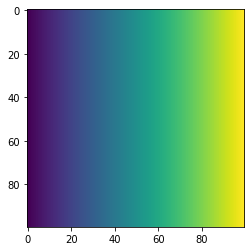

In [60]:
x = np.linspace(-3,8,100)
y = np.linspace(-3,10,100)
X,Y = np.meshgrid(x,y)
plt.imshow(X)

In [61]:
# visualize the decision function across all XY combinations
XY = np.vstack([X.ravel(),Y.ravel()]).T
DF = model.decision_function(XY).reshape(X.shape) #.decision_function is a function that defines the boundary

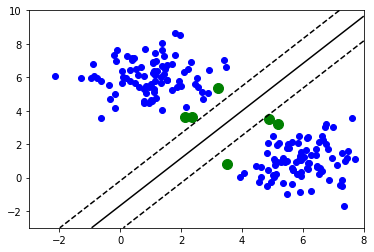

In [64]:
plt.scatter(trn_data[:,0],trn_data[:,1],c='b')
axis = plt.gca()
axis.contour(X,Y,DF,colors='k',levels=[-.6,0,.6],linestyles = ['--','-','--'])
axis.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,c='g')
plt.show()